In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import yfinance as yf
from ta.momentum import rsi
from ta.trend import macd

In [ ]:
stocks = pd.read_csv('./archive/sp500_companies.csv').set_index('Symbol')
stocks.head()

,Exchange,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
Symbol,,,,,,,,,,,,,,,
AAPL,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
NVDA,NMS,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
MSFT,NMS,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
AMZN,NMS,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
GOOGL,NMS,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [43]:
import time
from tqdm import tqdm
fundamentals = []

for stock in tqdm(stocks.index):
	fundamentals.append(yf.Ticker(stock).info)
	time.sleep(0.1)
fundamentals = pd.DataFrame(fundamentals).set_index("symbol")
fundamentals.index = fundamentals.index.rename("Symbol")  # for consistency with the stocks dataframe
fundamentals = fundamentals[["marketCap", "trailingPE", "forwardPE", "priceToBook", "trailingEps", "forwardEps", "bookValue", "payoutRatio", "beta", "fiveYearAvgDividendYield", "52WeekChange", "averageVolume", "enterpriseToRevenue", "profitMargins"]].fillna(0)
fundamentals.head()

100%|██████████| 502/502 [02:20<00:00,  3.58it/s]


,marketCap,trailingPE,forwardPE,priceToBook,trailingEps,forwardEps,bookValue,payoutRatio,beta,fiveYearAvgDividendYield,52WeekChange,averageVolume,enterpriseToRevenue,profitMargins
Symbol,,,,,,,,,,,,,,
AAPL,3.975578e+12,36.065680,32.376650,53.907030,7.46,8.31,4.991,0.1367,1.094,0.53,0.209980,53986404.0,9.738,0.26915
NVDA,5.036908e+12,59.108574,50.213596,50.299053,3.50,4.12,4.113,0.0114,2.123,0.06,0.447288,177418779.0,29.502,0.52414
MSFT,3.842763e+12,36.720882,34.583950,10.586201,14.08,14.95,48.840,0.2361,1.023,0.80,0.258470,20523919.0,13.161,0.35707
AMZN,2.715315e+12,35.875706,41.300810,7.343799,7.08,6.15,34.587,0.0000,1.281,0.00,0.224160,45069144.0,3.872,0.11063
GOOGL,3.427086e+12,28.035574,31.665178,8.857116,10.12,8.96,32.033,0.0809,1.000,0.00,0.656593,33495336.0,8.662,0.32233


In [44]:
normalized_fundamentals = (fundamentals - fundamentals.mean()) / fundamentals.std()
normalized_fundamentals.head()

,marketCap,trailingPE,forwardPE,priceToBook,trailingEps,forwardEps,bookValue,payoutRatio,beta,fiveYearAvgDividendYield,52WeekChange,averageVolume,enterpriseToRevenue,profitMargins
Symbol,,,,,,,,,,,,,,
AAPL,8.791352,-0.013172,0.213950,0.542696,-0.036933,-0.093747,-0.046419,-0.097920,0.266318,-0.826169,0.445155,3.575562,0.624976,0.945694
NVDA,11.216640,0.235196,0.686894,0.507106,-0.207299,-0.249041,-0.046462,-0.112094,2.663816,-1.131405,1.121724,12.791735,3.296692,2.767908
MSFT,8.487851,-0.006110,0.272476,0.115368,0.247869,0.152351,-0.044303,-0.086676,0.100892,-0.650821,0.583400,1.077060,1.087700,1.573989
AMZN,5.911475,-0.015220,0.450573,0.083384,-0.053282,-0.173803,-0.044991,-0.113384,0.702015,-1.170371,0.485584,2.909748,-0.167995,-0.187124
GOOGL,7.537973,-0.099724,0.195085,0.098311,0.077504,-0.069656,-0.045114,-0.104232,0.047304,-1.170371,1.718457,2.045581,0.479521,1.325730


In [42]:
normalized_fundamentals.to_csv("data/raw/fundamentals.csv")

In [ ]:
from tqdm import tqdm
values = []
for stock in tqdm(stocks.index):
    try:
        value = yf.Ticker(stock).history(period="5y", actions=False)
        values.append(value)
    except Exception as e:
        print(stock, e)


100%|██████████| 502/502 [01:15<00:00,  6.61it/s]


In [ ]:
for idx, stock_values in tqdm(enumerate(values)):
	stock_values["NormClose"] = (stock_values["Close"] - stock_values["Close"].mean()) / stock_values["Close"].std()
	# Log returns
	returns = 1 + stock_values['Close'].pct_change()

	returns.replace([np.inf, -np.inf], np.nan, inplace=True)

	returns = returns.dropna()
	# print(returns)

	stock_values['DailyLogReturn'] = np.log(returns)
	# print(np.log(returns))
	stock_values["ALR1W"] = stock_values["DailyLogReturn"].rolling(window=5).sum() * 5
	stock_values["ALR2W"] = stock_values["DailyLogReturn"].rolling(window=10).sum() * 5
	stock_values["ALR1M"] = stock_values["DailyLogReturn"].rolling(window=21).sum() * 21
	stock_values["ALR2M"] = stock_values["DailyLogReturn"].rolling(window=42).sum() * 21
	# print('ALR2W', stock_values["ALR2W"])
	# Normalizing the standard deviation
	stock_values["DailyLogReturn"] /= stock_values["DailyLogReturn"].std()
	stock_values["ALR1W"] /= stock_values["ALR1W"].std()
	stock_values["ALR2W"] /= stock_values["ALR2W"].std()
	stock_values["ALR1M"] /= stock_values["ALR1M"].std()
	stock_values["ALR2M"] /= stock_values["ALR2M"].std()
	stock_values["RSI"] = rsi(stock_values["Close"]) / 100
	stock_values["MACD"] = macd(stock_values["Close"])
	# stock_values.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
	# print(stock_values)
new_values = pd.concat(values, keys=stocks.index)
new_values.drop(columns=["Adj Close"], inplace=True)
new_values = new_values.dropna()
new_values.head(n=10)

502it [00:00, 556.95it/s]
/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/3722441086.py:32: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_values = pd.concat(values, keys=stocks.index)


Open        High         Low  \
Symbol Date                                                            
AAPL   2021-01-06 00:00:00-05:00  124.449839  127.694579  123.144145   
       2021-01-07 00:00:00-05:00  125.073488  128.259768  124.586290   
       2021-01-08 00:00:00-05:00  129.039236  129.234127  126.895568   
       2021-01-11 00:00:00-05:00  125.882234  126.837138  125.209899   
       2021-01-12 00:00:00-05:00  125.209891  126.369424  123.611882   
       2021-01-13 00:00:00-05:00  125.463213  128.084340  125.200137   
       2021-01-14 00:00:00-05:00  127.450983  127.645859  125.463207   
       2021-01-15 00:00:00-05:00  125.482721  126.885854  123.748297   
       2021-01-19 00:00:00-05:00  124.508315  125.414511  123.689826   
       2021-01-20 00:00:00-05:00  125.365781  129.097719  125.258597   

                                       Close       Volume  NormClose  \
Symbol Date                                                            
AAPL   2021-01-06 00:00:00-05:00  123.358513  155088000.0  -1.367334   
       2021-01-07 00:00:00-05:00  127.567940  109578200.0  -1.255410   
       2021-01-08 00:00:00-05:00  128.668976  105158200.0  -1.226134   
       2021-01-11 00:00:00-05:00  125.677605  100384500.0  -1.305672   
       2021-01-12 00:00:00-05:00  125.502213   91951100.0  -1.310335   
       2021-01-13 00:00:00-05:00  127.538681   88636800.0  -1.256188   
       2021-01-14 00:00:00-05:00  125.609375   90221800.0  -1.307486   
       2021-01-15 00:00:00-05:00  123.884712  111598500.0  -1.353343   
       2021-01-19 00:00:00-05:00  124.557037   90757300.0  -1.335466   
       2021-01-20 00:00:00-05:00  128.649490  104319500.0  -1.226652   

                                  DailyLogReturn     ALR1W     ALR2W  \
Symbol Date                                                            
AAPL   2021-01-06 00:00:00-05:00       -1.934677 -1.618837 -0.241960   
       2021-01-07 00:00:00-05:00        1.895864 -0.541363 -0.138178   
       2021-01-08 00:00:00-05:00        0.485571 -0.123687  0.156769   
       2021-01-11 00:00:00-05:00       -1.329090 -0.085142 -0.433440   
       2021-01-12 00:00:00-05:00       -0.078907 -0.435228 -1.124486   
       2021-01-13 00:00:00-05:00        0.909466  0.852536 -0.566530   
       2021-01-14 00:00:00-05:00       -0.861241 -0.395819 -0.692863   
       2021-01-15 00:00:00-05:00       -0.781161 -0.969367 -0.808100   
       2021-01-19 00:00:00-05:00        0.305806 -0.229123 -0.232338   
       2021-01-20 00:00:00-05:00        1.826571  0.633635  0.146683   

                                     ALR1M     ALR2M       RSI      MACD  
Symbol Date                                                               
AAPL   2021-01-06 00:00:00-05:00  0.473012  0.971407  0.487283  2.586888  
       2021-01-07 00:00:00-05:00  0.761965  0.958317  0.562550  2.460810  
       2021-01-08 00:00:00-05:00  0.809531  1.054517  0.579921  2.421819  
       2021-01-11 00:00:00-05:00  0.777091  1.021368  0.519557  2.125044  
       2021-01-12 00:00:00-05:00  0.596973  1.037353  0.516164  1.854320  
       2021-01-13 00:00:00-05:00  0.906150  0.900877  0.552686  1.783535  
       2021-01-14 00:00:00-05:00  0.769745  0.773378  0.513166  1.553847  
       2021-01-15 00:00:00-05:00 -0.078511  0.632548  0.480115  1.218605  
       2021-01-19 00:00:00-05:00  0.002117  0.600218  0.493802  0.995696  
       2021-01-20 00:00:00-05:00  0.345585  0.994886  0.568303  1.136169

In [21]:
new_values = pd.concat(values, keys=stocks.index)
new_values.drop(columns=["Adj Close"], inplace=True)
new_values = new_values.dropna()
new_values.head(n=10)

/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/1928561453.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  new_values = pd.concat(values, keys=stocks.index)


Open        High         Low  \
Symbol Date                                                            
MMM    2021-01-06 00:00:00-05:00  120.629617  122.620082  120.154701   
       2021-01-07 00:00:00-05:00  119.819447  121.146437  116.048030   
       2021-01-08 00:00:00-05:00  118.150230  118.408648  114.965470   
       2021-01-11 00:00:00-05:00  116.006083  116.732433  115.237838   
       2021-01-12 00:00:00-05:00  115.866436  116.760404  114.595324   
       2021-01-13 00:00:00-05:00  116.823255  117.151507  115.971195   
       2021-01-14 00:00:00-05:00  116.823281  116.886129  115.398519   
       2021-01-15 00:00:00-05:00  115.677828  116.117833  114.106402   
       2021-01-19 00:00:00-05:00  116.816288  118.415652  116.495020   
       2021-01-20 00:00:00-05:00  118.059438  119.134981  117.633402   

                                       Close     Volume  NormClose  \
Symbol Date                                                          
MMM    2021-01-06 00:00:00-05:00  121.656281  4002294.0   0.328626   
       2021-01-07 00:00:00-05:00  118.534378  7012626.0   0.210147   
       2021-01-08 00:00:00-05:00  116.369278  5750488.0   0.127979   
       2021-01-11 00:00:00-05:00  115.377518  3272974.0   0.090341   
       2021-01-12 00:00:00-05:00  116.292473  3527124.0   0.125065   
       2021-01-13 00:00:00-05:00  116.131828  2509208.0   0.118968   
       2021-01-14 00:00:00-05:00  116.222641  3462898.0   0.122414   
       2021-01-15 00:00:00-05:00  115.621964  4246637.0   0.099618   
       2021-01-19 00:00:00-05:00  118.115326  4668227.0   0.194243   
       2021-01-20 00:00:00-05:00  118.883560  3196071.0   0.223399   

                                  DailyLogReturn     ALR1W     ALR2W  \
Symbol Date                                                            
MMM    2021-01-06 00:00:00-05:00        0.875880  0.053706 -0.160696   
       2021-01-07 00:00:00-05:00       -1.508235 -0.701926 -0.561789   
       2021-01-08 00:00:00-05:00       -1.069503 -1.315769 -0.827675   
       2021-01-11 00:00:00-05:00       -0.496566 -1.087967 -1.049513   
       2021-01-12 00:00:00-05:00        0.458262 -0.824440 -0.919274   
       2021-01-13 00:00:00-05:00       -0.080198 -1.277402 -0.851344   
       2021-01-14 00:00:00-05:00        0.045350 -0.541358 -0.864972   
       2021-01-15 00:00:00-05:00       -0.300626 -0.177086 -1.038602   
       2021-01-19 00:00:00-05:00        1.237814  0.644614 -0.308447   
       2021-01-20 00:00:00-05:00        0.376123  0.605699 -0.152181   

                                     ALR1M     ALR2M       RSI      MACD  
Symbol Date                                                               
MMM    2021-01-06 00:00:00-05:00  0.127587  0.866139  0.540555  0.484265  
       2021-01-07 00:00:00-05:00 -0.032340  0.447040  0.417764  0.224140  
       2021-01-08 00:00:00-05:00 -0.440339  0.284913  0.357168 -0.154930  
       2021-01-11 00:00:00-05:00 -0.757792  0.181347  0.333318 -0.529271  
       2021-01-12 00:00:00-05:00 -0.524894 -0.066025  0.374796 -0.743539  
       2021-01-13 00:00:00-05:00 -0.581551 -0.082828  0.370438 -0.915755  
       2021-01-14 00:00:00-05:00 -0.502325  0.044670  0.374863 -1.033001  
       2021-01-15 00:00:00-05:00 -0.686181 -0.156002  0.356990 -1.161006  
       2021-01-19 00:00:00-05:00 -0.466772 -0.178006  0.469960 -1.049163  
       2021-01-20 00:00:00-05:00 -0.473944 -0.105513  0.499158 -0.888297

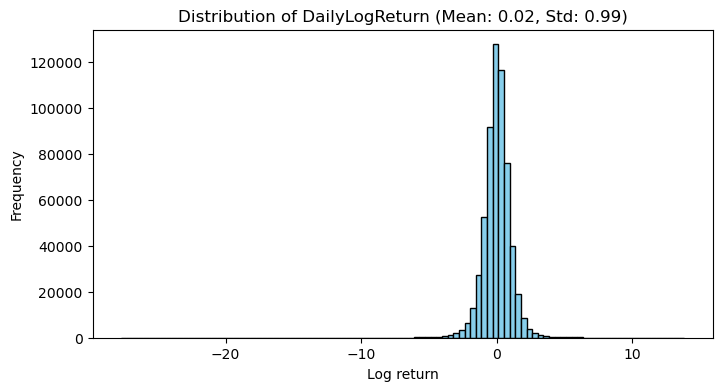

In [48]:
plt.figure(figsize=(8, 4))

column = "DailyLogReturn"
plt.hist(new_values[column], bins=100, color="skyblue", edgecolor="black")
plt.title(f"Distribution of {column} (Mean: {new_values[column].mean():.2f}, Std: {new_values[column].std():.2f})")
plt.xlabel("Log return")
plt.ylabel("Frequency")
plt.show()

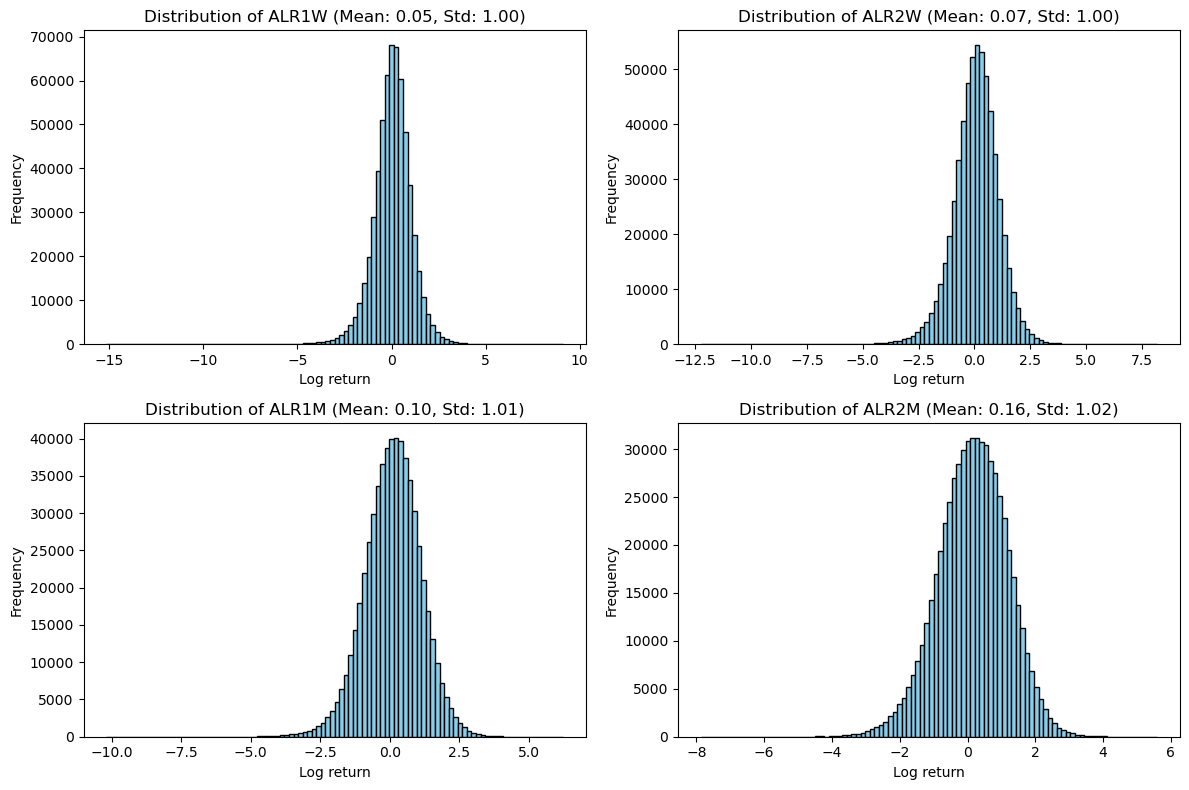

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for idx, column in enumerate(["ALR1W", "ALR2W", "ALR1M", "ALR2M"]):
	ax = axs[idx // 2, idx % 2]
	ax.hist(new_values[column], bins=100, color="skyblue", edgecolor="black")
	ax.set_title(f"Distribution of {column} (Mean: {new_values[column].mean():.2f}, Std: {new_values[column].std():.2f})")
	ax.set_xlabel("Log return")
	ax.set_ylabel("Frequency")
	
plt.tight_layout()
plt.show()

In [50]:
stocks.head()

,Exchange,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
Symbol,,,,,,,,,,,,,,,
AAPL,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
NVDA,NMS,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
MSFT,NMS,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
AMZN,NMS,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
GOOGL,NMS,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly_returns[stock] = weekly_data
/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly_returns[stock] = weekly_data
/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

Error processing DFS: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
Error processing HES: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
Error processing ANSS: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'


/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly_returns[stock] = weekly_data
/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly_returns[stock] = weekly_data
/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

Error processing JNPR: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
Error processing WBA: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
Error processing PARA: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
Correlation matrix shape: (496, 496)

Example of correlation matrix (first 5x5):
           AAPL      NVDA      MSFT      AMZN     GOOGL
AAPL   1.000000  0.462198  0.555679  0.518167  0.572746
NVDA   0.462198  1.000000  0.634784  0.568603  0.448268
MSFT   0.555679  0.634784  1.000000  0.609315  0.595888
AMZN   0.518167  0.568603  0.609315  1.000000  0.613130
GOOGL  0.572746  0.448268  0.595888  0.613130  1.000000


/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly_returns[stock] = weekly_data
/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weekly_returns[stock] = weekly_data
/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_91851/2406735586.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, whi

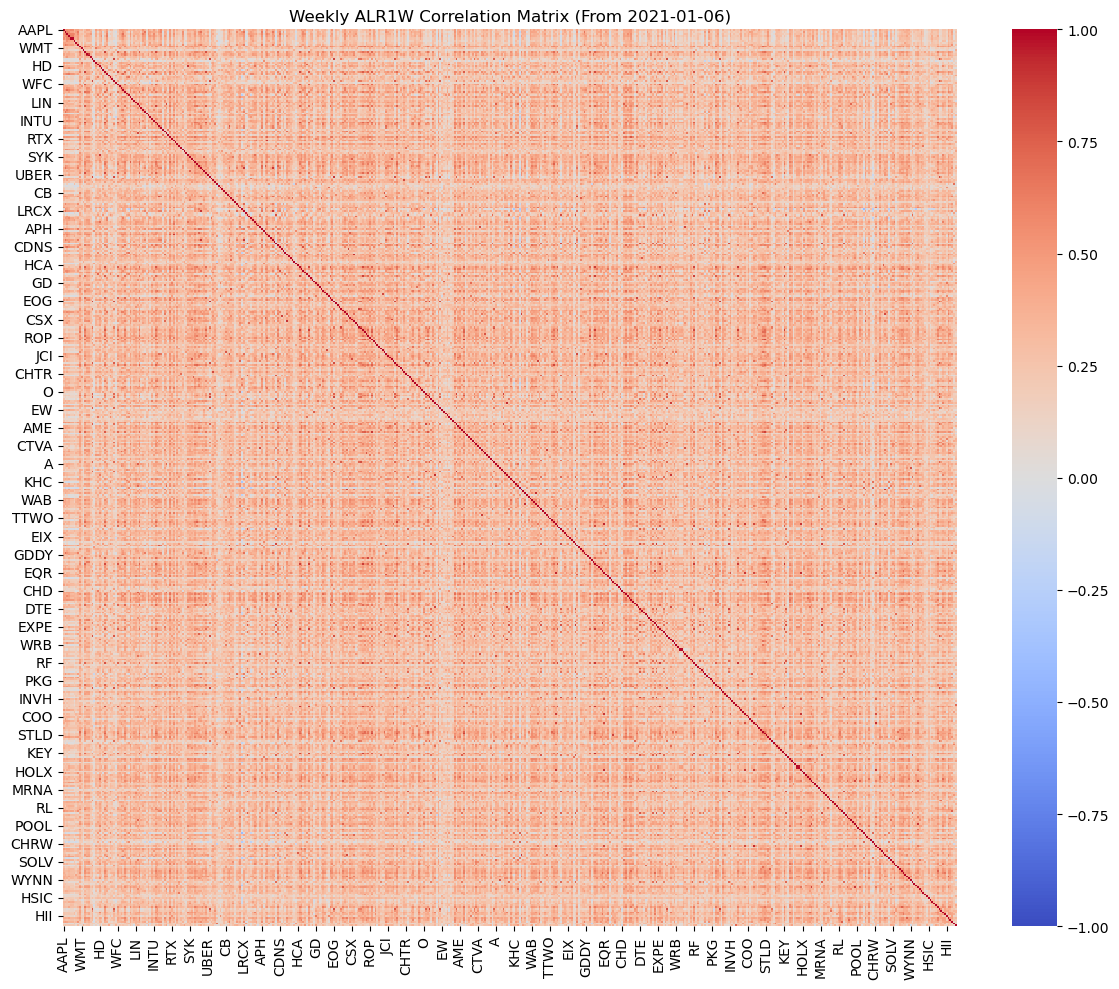


Average correlation: 0.2842

Top 10 highest correlations:
GOOGL - GOOG: 0.9967
FOXA - FOX: 0.9904
NWS - NWSA: 0.9751
AVB - EQR: 0.9398
MAA - CPT: 0.9291
DHI - LEN: 0.9278
EQR - UDR: 0.9276
VMC - MLM: 0.9176
REG - FRT: 0.9058
FITB - KEY: 0.9035

Top 10 highest correlations:
GOOGL - GOOG: 0.9967
FOXA - FOX: 0.9904
NWS - NWSA: 0.9751
AVB - EQR: 0.9398
MAA - CPT: 0.9291
DHI - LEN: 0.9278
EQR - UDR: 0.9276
VMC - MLM: 0.9176
REG - FRT: 0.9058
FITB - KEY: 0.9035


In [59]:
import seaborn as sns
# 创建一个空的DataFrame来存储所有股票的周度ALR1W
weekly_returns = pd.DataFrame()

# 遍历所有股票，提取ALR1W并重采样到周频率
for stock in stocks.index:
    try:
        stock_data = values[stocks.index.get_loc(stock)]  # 获取股票数据
        # 确保ALR1W已经计算
        if 'ALR1W' not in stock_data.columns:
            # 计算日度对数收益
            stock_data['DailyLogReturn'] = np.log(1 + stock_data['Close'].pct_change())
            # 计算周度对数收益（5天滚动和）
            stock_data['ALR1W'] = stock_data['DailyLogReturn'].rolling(window=5).sum() * 5
            # 标准化
            stock_data['ALR1W'] = stock_data['ALR1W'] / stock_data['ALR1W'].std()
        
        # 重采样到周频率（取每周最后一个交易日的值）
        weekly_data = stock_data['ALR1W'].resample('W').last()
        weekly_returns[stock] = weekly_data

    except Exception as e:
        print(f"Error processing {stock}: {str(e)}")

# 从2021-01-06开始筛选数据
start_date = '2021-01-06'
weekly_returns = weekly_returns[weekly_returns.index >= start_date]

# 计算相关性矩阵
correlation_matrix = weekly_returns.corr()

# 打印相关性矩阵的基本信息
print("Correlation matrix shape:", correlation_matrix.shape)
print("\nExample of correlation matrix (first 5x5):")
print(correlation_matrix.iloc[:5, :5])

# 可视化相关性矩阵
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            center=0,
            vmin=-1, 
            vmax=1)
plt.title('Weekly ALR1W Correlation Matrix (From 2021-01-06)')
plt.tight_layout()
plt.show()

# 计算一些基本统计量
avg_correlation = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean()
print(f"\nAverage correlation: {avg_correlation:.4f}")

# 找出相关性最高的几对股票
correlations = []
for i in range(len(correlation_matrix.index)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlations.append((
            correlation_matrix.index[i],
            correlation_matrix.columns[j],
            correlation_matrix.iloc[i,j]
        ))

# 排序并显示最高相关性的前10对股票
top_correlations = sorted(correlations, key=lambda x: abs(x[2]), reverse=True)[:10]
print("\nTop 10 highest correlations:")
for stock1, stock2, corr in top_correlations:
    print(f"{stock1} - {stock2}: {corr:.4f}")

# 保存结果（可选）
# correlation_matrix.to_csv('weekly_correlations_from_2021.csv')

In [67]:
weekly_returns.dropna(axis=1).to_csv('./data/raw/weekly_returns.csv')

In [68]:
weekly_returns.head()

,AAPL,NVDA,MSFT,AMZN,GOOGL,GOOG,META,TSLA,AVGO,BRK-B,...,APA,MOS,MHK,CE,HII,CZR,BWA,QRVO,FMC,AMTM
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-10 00:00:00-05:00,-0.123687,0.242429,-0.378853,-0.477075,0.613705,0.750923,-0.343752,2.581391,0.320071,0.381205,...,2.149616,2.580269,0.360667,0.846640,-0.200051,0.836499,0.962620,1.348889,0.789427,NaN
2021-01-17 00:00:00-05:00,-0.969367,-0.459599,-0.964454,-0.516445,-0.960328,-0.968183,-1.038995,-0.738374,0.008553,-0.094969,...,0.563075,1.114673,0.679778,-0.331963,0.341542,0.213534,-0.986460,-0.209972,-0.129378,NaN
2021-01-24 00:00:00-05:00,1.940776,0.547981,1.762202,1.062382,2.152232,2.135243,1.846799,0.022668,0.512608,-0.369001,...,-1.548578,-0.336283,-0.274163,-0.753000,-0.630235,0.245502,1.788912,-0.319325,-0.932642,NaN
2021-01-31 00:00:00-05:00,-1.342540,-0.779353,0.785023,-0.547918,-0.845156,-0.844229,-1.009374,-0.757407,-0.575749,-0.901156,...,-1.894703,-1.474842,-0.790944,-1.197858,-1.550996,-1.724866,-0.439842,-0.987736,-0.837837,NaN
2021-02-07 00:00:00-05:00,0.952229,0.651250,1.291844,0.921149,3.223903,3.224850,0.617166,0.834346,0.614348,1.294639,...,1.759148,1.064699,1.133028,0.680250,0.999671,2.307805,0.600643,-0.392746,0.934123,NaN


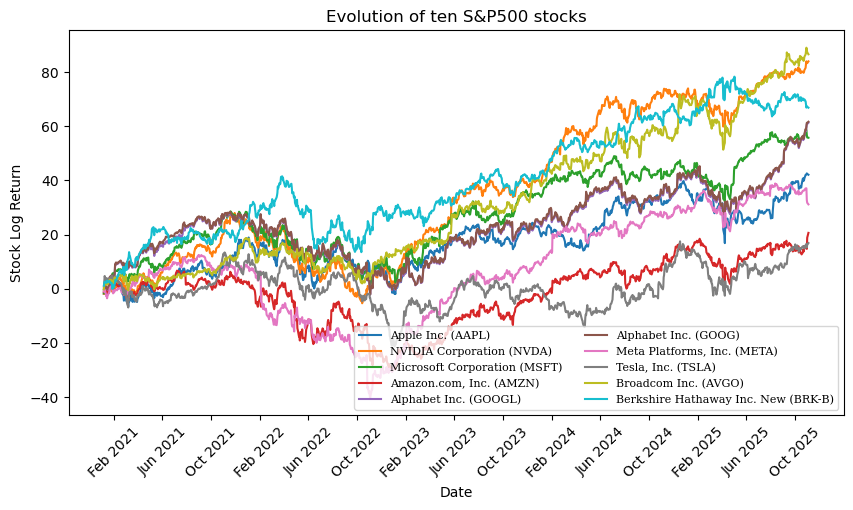

In [56]:
plt.figure(figsize=(10, 5))

for stock in stocks.index[:10]:
	plt.plot(new_values.loc[stock].index, np.cumsum(new_values.loc[stock]["DailyLogReturn"]), label=f'{stocks.loc[stock]["Shortname"]} ({stock})')
plt.title(f"Evolution of ten S&P500 stocks")
plt.xlabel('Date')
plt.gca().tick_params(axis='x', rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.ylabel('Stock Log Return')
plt.legend(ncol=2, loc="lower right", prop={'size': 8, 'family': 'serif'})
plt.show()

In [57]:
new_values.to_csv("./data/raw/history.csv")